# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import os
import PIL

from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from keras.layers import Flatten, Dense

# Loading the Dataset

In [ ]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
classes=[]
for i in os.listdir(data_dir):
    classes.append(i)

# Target class names

In [ ]:
classes

['tulips', 'LICENSE.txt', 'dandelion', 'sunflowers', 'roses', 'daisy']

# Total number of images in the dataset

In [ ]:
image = len(list(data_dir.glob('*/*.jpg')))
print(image)

3670


# Total number of sunflower images

In [ ]:
sunflowers = list(data_dir.glob('sunflowers*/*'))
len(sunflowers)

699

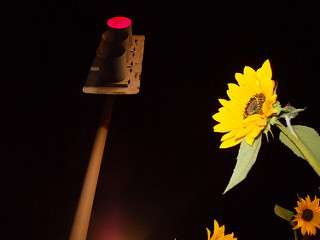

In [ ]:
PIL.Image.open(sunflowers[0])

# Total number of daisy images

In [ ]:
daisy = list(data_dir.glob('daisy*/*'))
len(daisy)

633

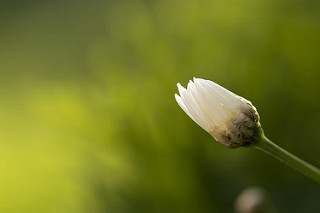

In [ ]:
PIL.Image.open(daisy[10])

# Loading images into Dastasets

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    batch_size=32,
    subset='training',
    image_size=(180,180),
    seed=123)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
target = train_ds.class_names
target

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
for images,labels in train_ds.take(1):
    first_set=images
    print(type(images))
first_set.shape

<class 'tensorflow.python.framework.ops.EagerTensor'>


TensorShape([32, 180, 180, 3])

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  batch_size=32,
  subset='validation',
  image_size=(180,180),
  seed=123)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


# Visualization

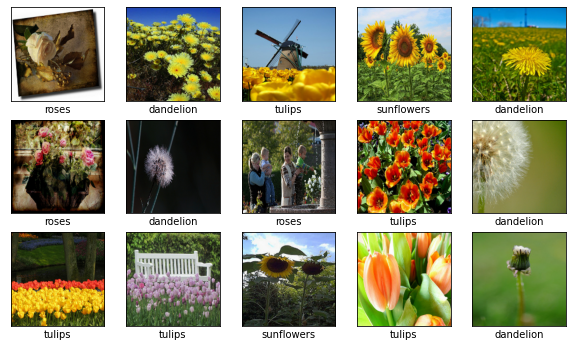

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(first_set[i].numpy().astype('uint8'))
    plt.xlabel(target[labels[i]])
plt.show()

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Creating the model

1.First will add one layer to rescale the values of the pixels between 0 to 1

2.Then will start adding convolution layer and pooling layers

3.Next will add one Flatten layer

4.Finally will create one fully connected layer

In [ ]:
model = Sequential()

In [ ]:
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
layers.MaxPool2D(pool_size=(2,2))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
layers.MaxPool2D(pool_size=(2,2))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
layers.MaxPool2D(pool_size=(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=len(target),activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 180, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 2073600)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               265420928 
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the model

In [ ]:
result = model.fit(train_ds,
                   validation_data=val_ds,
                   epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


92/92 [==============================] - 643s 7s/step - loss: 6.3203 - accuracy: 0.3716 - val_loss: 1.1806 - val_accuracy: 0.5136
Epoch 2/10
92/92 [==============================] - 646s 7s/step - loss: 0.9515 - accuracy: 0.6199 - val_loss: 1.0380 - val_accuracy: 0.5995
Epoch 3/10
92/92 [==============================] - 653s 7s/step - loss: 0.3749 - accuracy: 0.8787 - val_loss: 1.8333 - val_accuracy: 0.5381
Epoch 4/10
92/92 [==============================] - 669s 7s/step - loss: 0.1317 - accuracy: 0.9653 - val_loss: 1.7569 - val_accuracy: 0.5613
Epoch 5/10
92/92 [==============================] - 669s 7s/step - loss: 0.1045 - accuracy: 0.9724 - val_loss: 1.9032 - val_accuracy: 0.5531
Epoch 6/10
92/92 [==============================] - 662s 7s/step - loss: 0.0499 - accuracy: 0.9894 - val_loss: 2.2134 - val_accuracy: 0.5463
Epoch 7/10
92/92 [==============================] - 659s 7s/step - loss: 0.0400 - accuracy: 0.9884 - val_loss: 2.0518 - val_accuracy: 0.5395
Epoch 8/10
92/92 [======

# Visualizing training results

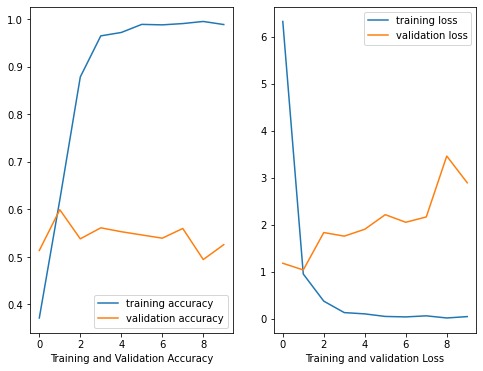

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(result.history['accuracy'],label='training accuracy')
plt.plot(result.history['val_accuracy'],label='validation accuracy')
plt.legend(loc = 'lower right')
plt.xlabel('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(result.history['loss'],label='training loss')
plt.plot(result.history['val_loss'],label='validation loss')
plt.legend(loc = 'upper right')
plt.xlabel('Training and validation Loss')

plt.show()

# Data Argumentation



In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomFlip('vertical',input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomRotation(0.4)
])

In [ ]:
plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

# Dropout



In [ ]:
model = Sequential([
                         data_augmentation,
                         layers.experimental.preprocessing.Rescaling(1./255),
                         layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
                         layers.MaxPool2D(pool_size=(2,2)),
                         layers.Dropout(0.2),
                         layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
                         layers.MaxPool2D(pool_size=(2,2)),
                         layers.Dropout(0.3),
                         layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
                         layers.MaxPool2D(pool_size=(2,2)),
                         layers.Dropout(0.2),
                         layers.Flatten(),
                         layers.Dense(units=128,activation='relu'),
                         layers.Dense(units=80,activation='relu'),
                         layers.Dense(units=5,activation='softmax')
])

# Compile and train the model

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
result = model.fit(train_ds,
                   validation_data=val_ds,
                   epochs = 10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


92/92 [==============================] - 214s 2s/step - loss: 1.4268 - accuracy: 0.3794 - val_loss: 1.2936 - val_accuracy: 0.4591
Epoch 2/10
92/92 [==============================] - 213s 2s/step - loss: 1.1787 - accuracy: 0.4881 - val_loss: 1.1177 - val_accuracy: 0.5545
Epoch 3/10
92/92 [==============================] - 209s 2s/step - loss: 1.1137 - accuracy: 0.5371 - val_loss: 1.0860 - val_accuracy: 0.5463
Epoch 4/10
92/92 [==============================] - 207s 2s/step - loss: 1.0251 - accuracy: 0.5780 - val_loss: 1.0025 - val_accuracy: 0.6172
Epoch 5/10
92/92 [==============================] - 217s 2s/step - loss: 0.9842 - accuracy: 0.5984 - val_loss: 0.9477 - val_accuracy: 0.6376
Epoch 6/10
92/92 [==============================] - 207s 2s/step - loss: 0.9495 - accuracy: 0.6236 - val_loss: 0.9372 - val_accuracy: 0.6390
Epoch 7/10
92/92 [==============================] - 207s 2s/step - loss: 0.9102 - accuracy: 0.6471 - val_loss: 0.9558 - val_accuracy: 0.6294
Epoch 8/10
92/92 [======

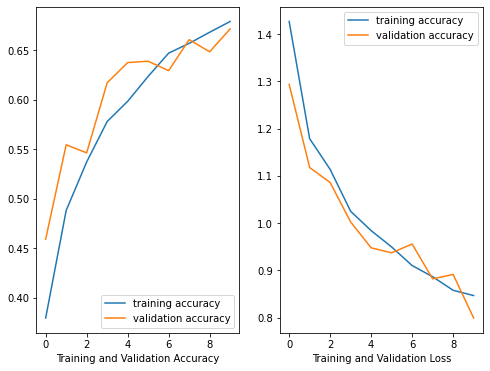

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(result.history['accuracy'],label='training accuracy')
plt.plot(result.history['val_accuracy'],label='validation accuracy')
plt.legend(loc='lower right')
plt.xlabel('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(result.history['loss'],label='training accuracy')
plt.plot(result.history['val_loss'],label='validation accuracy')
plt.legend(loc='upper right')
plt.xlabel('Training and Validation Loss')

plt.show()

# Transfer Learning : Using Pre-trained model to improve model performance

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import RMSprop

In [ ]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=url, untar=True)

train_datagen = ImageDataGenerator(
    rescale=1./255,   
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=90,
    validation_split=0.2)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(data_dir, target_size = (224, 224), batch_size = 32, subset = 'training', class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(data_dir, target_size = (224, 224), batch_size = 32, subset = 'validation', class_mode = 'binary')

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
vgg16_model = VGG16(weights = 'imagenet', include_top=False, input_shape=(224,224,3))

for layer in model.layers:
    layer.trainable=False

model=Sequential()
for layers in vgg16_model.layers:
    model.add(layers)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
training_images = 2936
validation_images = 734

history = model.fit_generator(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = 92,
    epochs = 1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


92/92 [==============================] - 5913s 64s/step - loss: nan - accuracy: 0.2310 - val_loss: nan - val_accuracy: 0.1724
